<a href="https://colab.research.google.com/github/Shannonari1/Start-up-practice2/blob/main/Logistic_Regression_Shannon_Young.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##We are going to create a machine learning model for a telecommunication company, to determine if its customers will leave for a competitor, in order to take proactive action to retain the customers.

#What is the difference between linear regression and logistic regression?
## Linear regression is appropriate for predicting dependent variables that are composed of continous values (e.g., predicting house prices), but it is inappropriate for predicting dependent variables that categorical (e.g., yes or no, true or false, etc).

#Python libraries
## Pandas: "Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software released under the three-clause BSD license" (Wikipedia, 2023).

## Numpy: "NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays" (Wikepdia, 2023).  

## Scikit-Learn: "Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support-vector machines, ..." (Wikipedia, 2023).

## Matplotlib: "Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK" (Wikipedia, 2023).







In [210]:
#Import libraries that are required for the creation of the machine learning model
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

#Dataset
## The dataset that we will be using is a telecommunications dataset to predict customer churn. This dataset represents historical information about the customers where each row is representative of one customer.

## Some of the variables or featurs of this dataset are as follow:

## * Customers who left within the last month – the column is called Churn
## * Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
## * Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
## * Demographic info about customers – gender, age range, and if they have partners and dependents

In [211]:
#Load the data from a CSV file
water_df = pd.read_csv("waterQuality.csv")
water_df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


# Data Pre-Processing

In [225]:
# Let's select the features or independent variables and the dependent variable or target vector
# We also change the data type to integer since it is required by skitlearn algorithm
# Integers – This value is represented by int class. It contains positive or negative whole numbers (without fractions or decimals)

water_df = water_df[['ammonia', 'arsenic', 'chloramine', 'flouride', 'bacteria', 'lead', 'nitrates', 'mercury', 'radium', 'is_safe']]
water_df['is_safe'] = pd.to_numeric(water_df['is_safe'], errors='coerce')

water_df.head()


,ammonia,arsenic,chloramine,flouride,bacteria,lead,nitrates,mercury,radium,is_safe
0,9.08,0.04,0.35,0.05,0.20,0.054,16.08,0.007,6.78,1.0
1,21.16,0.01,5.28,0.90,0.65,0.100,2.01,0.003,3.21,1.0
2,14.02,0.04,4.24,0.99,0.05,0.078,14.16,0.006,7.07,0.0
3,11.33,0.04,7.23,1.08,0.71,0.016,1.41,0.004,1.72,1.0
4,24.33,0.03,2.67,0.61,0.13,0.117,6.74,0.003,2.41,1.0


# In this step, we need to define our X and our Y. X= Features or independent variables and Y= Dependent variable or target vector

In [214]:
X = water_df.drop('is_safe', axis=1).values
X[0:5]

array([['9.08', 0.04, 0.35, 0.05, 0.2, 0.054, 16.08, 0.007, 6.78],
       ['21.16', 0.01, 5.28, 0.9, 0.65, 0.1, 2.01, 0.003, 3.21],
       ['14.02', 0.04, 4.24, 0.99, 0.05, 0.078, 14.16, 0.006, 7.07],
       ['11.33', 0.04, 7.23, 1.08, 0.71, 0.016, 1.41, 0.004, 1.72],
       ['24.33', 0.03, 2.67, 0.61, 0.13, 0.117, 6.74, 0.003, 2.41]],
      dtype=object)

In [215]:
y = water_df['is_safe'].values
y[0:5]

array([1., 1., 0., 1., 1.])

#In this step, we normalize our dataset.

In [216]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)
X[0:5]

array([['9.08', 0.04, 0.35, 0.05, 0.2, 0.054, 16.08, 0.007, 6.78],
       ['21.16', 0.01, 5.28, 0.9, 0.65, 0.1, 2.01, 0.003, 3.21],
       ['14.02', 0.04, 4.24, 0.99, 0.05, 0.078, 14.16, 0.006, 7.07],
       ['11.33', 0.04, 7.23, 1.08, 0.71, 0.016, 1.41, 0.004, 1.72],
       ['24.33', 0.03, 2.67, 0.61, 0.13, 0.117, 6.74, 0.003, 2.41]],
      dtype=object)

# In this step we split the dataset into train/test sets

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6396, 9) (6396,)
Test set: (1600, 9) (1600,)


In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

#We will need to confusion matrix for the assignment
from sklearn.metrics import confusion_matrix

#Impute missing values using mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


# Scale the features using StandardScaler
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


# You can experiment with these optimizers to determine if they can yield greater accuracy:  ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers'

# Train the Logistic Regression model
LR = LogisticRegression(C=0.01, solver='liblinear', class_weight='balanced').fit(X_train_scaled, y_train)
LR

LogisticRegression(C=0.01, class_weight='balanced', solver='liblinear')

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix

# Predict the target values
y_pred = LR.predict(X_test_scaled)
y_pred


array([1., 0., 0., ..., 1., 0., 0.])

# Let's evaluate our machine learning model

## jaccard index
###  If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [220]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred,pos_label=0)

0.7434166103983795

### Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. "The more the predicted probability diverges from the actual value, the higher is the log-loss value" (Gaurav Dembla, 2020).

Reference
Gaurav Dembla. (2020). Intuition behind Log-loss score. Retrieved on March 19, 2023 from https://towardsdatascience.com/intuition-behind-log-loss-score-4e0c9979680a

In [221]:
from sklearn.metrics import log_loss
y_pred_proba = LR.predict_proba(X_test_imputed)
log_loss(y_test, y_pred)

8.560367679915323

# Confusion matrix

In [222]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[ 119   60]
 [ 320 1101]]


Confusion matrix, without normalization
[[ 119   60]
 [ 320 1101]]


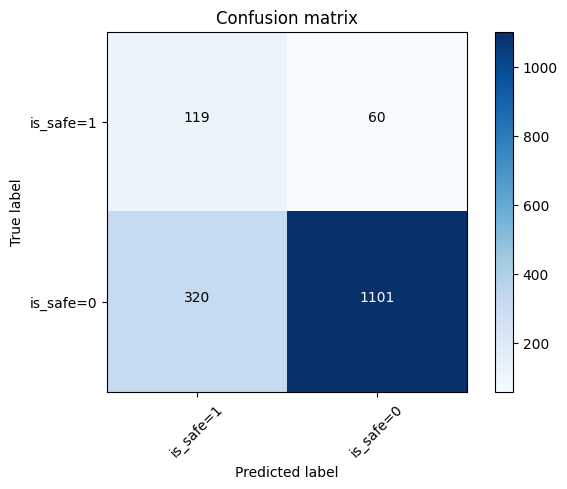

In [223]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['is_safe=1','is_safe=0'],normalize= False,  title='Confusion matrix')

# Now, lets calculate the precision and recall

In [224]:
print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.95      0.77      0.85      1421
         1.0       0.27      0.66      0.39       179

    accuracy                           0.76      1600
   macro avg       0.61      0.72      0.62      1600
weighted avg       0.87      0.76      0.80      1600



### Based on the count of each section, we can calculate precision and recall of each label:

### Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

### Recall is the true positive rate. It is defined as: Recall = TP / (TP + FN)

### So, we can calculate the precision and recall of each class.

### F1 score: Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

### The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

### Finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.

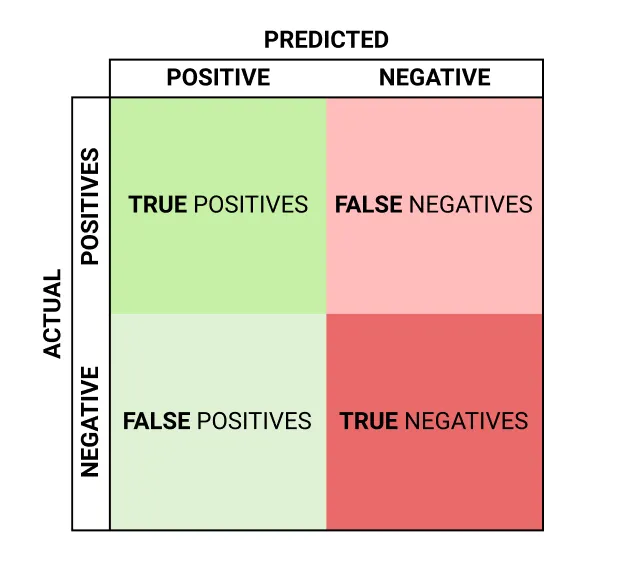

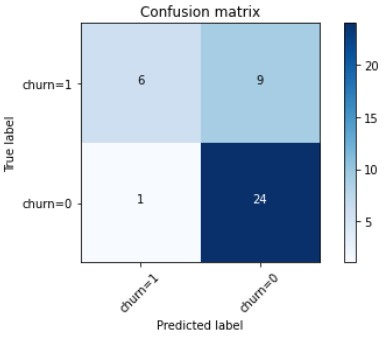


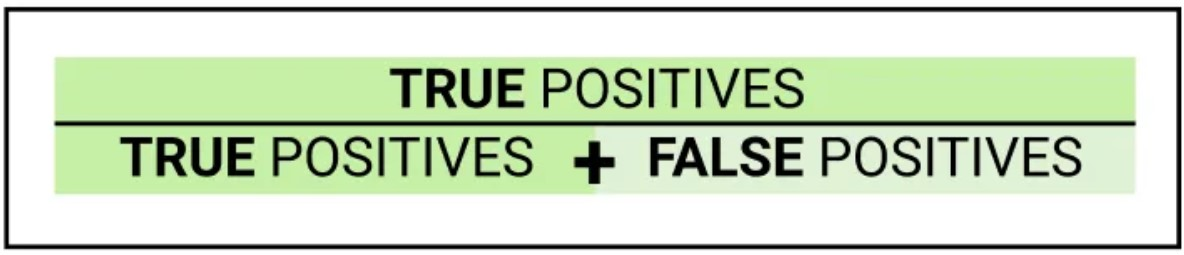


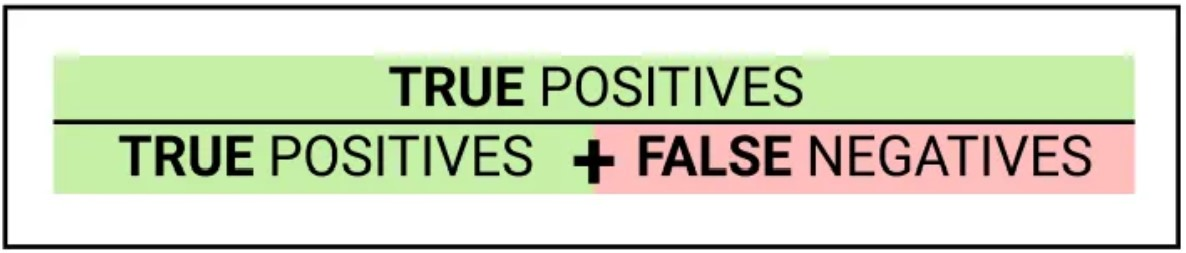


Images from Adam Shafi (2022).

# Let's create a histogram

In [201]:
#Let's import one more library

import seaborn as sns



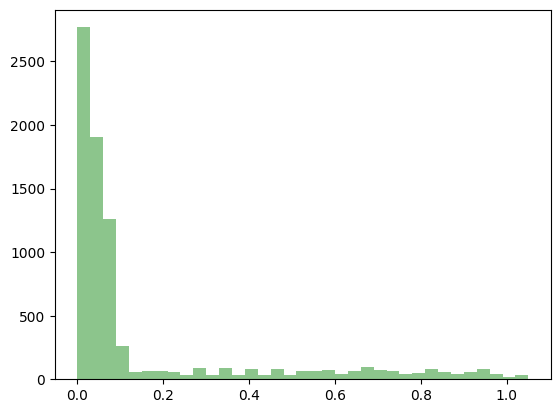

In [205]:
# Now, let's plot 'age'

# plotting histogram
plt.hist(water_df['arsenic'],bins = 35,
         alpha = 0.45, color = 'green')
plt.show()


# Now, use the same code to create histogram for any variable you want